In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import mplcyberpunk
import os

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error


%matplotlib inline

In [2]:
# Load training data
data_train_path = os.path.join("..", "data", "train", "training", "real_estate_train.csv")
data_train = pd.read_csv(data_train_path)
data_train.head ()

,Location,Price,Commission,TVA,Rooms,Size,Floor,Composition
0,Marasti,178000,NaN,False,3,73.0,5/6,Dec
1,Zorilor,155646,NaN,True,3,63.0,1/4,Dec
2,Manastur,150000,Comision 0%,False,3,70.0,6/10,Dec
3,Manastur,127990,Comision 0%,False,2,49.0,7/10,Semidec
4,Gheorgheni,185000,Comision 0%,False,3,65.0,Parter/4,Dec


In [3]:
# Load test data
data_test_path = os.path.join("..", "data", "train", "test", "real_estate_test.csv")
data_test = pd.read_csv(data_test_path)
data_test.head ()

,Location,Price,Commission,TVA,Rooms,Size,Floor,Composition
0,Marasti,133300,NaN,True,3,62.00,3/6,Semidec
1,Calea Turzii,129000,Comision 0%,False,2,50.00,2/6,Semidec
2,Semicentral,184900,NaN,False,2,57.00,4/6,Dec
3,Zorilor,144900,NaN,False,2,44.55,1/4,Dec
4,Zorilor,104179,NaN,True,1,41.00,1/4,Semidec


In [4]:
# Feature engineering
# Handle categorical features
le = LabelEncoder()

def handle_categorical_features (data):
  categorical_cols = [col for col in data.columns if data[col].dtype == 'object']
  le.fit(data[categorical_cols].values.ravel())  # Fit on all categories (including unseen)
  return categorical_cols

def encode_label(col):
  return le.transform(col)

train_categorical_columns = handle_categorical_features (data_train)
data_train[train_categorical_columns] = data_train[train_categorical_columns].apply(encode_label)

test_categorical_columns = handle_categorical_features (data_test)
data_test[test_categorical_columns] = data_test[test_categorical_columns].apply(encode_label)

In [5]:
# Separate features and target variable
X_train = data_train.drop('Price', axis=1)
y_train = data_train['Price']

# Train-Test Split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [6]:
# Random Forest Regression
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)
y_val_pred_rf = model_rf.predict(X_val)
val_rf_mse = mean_squared_error(y_val, y_val_pred_rf)
print(f"Validation Set - Random Forest Mean Squared Error: {val_rf_mse}")

y_test_pred_rf = model_rf.predict(data_test.drop('Price', axis=1))
test_rf_mse = mean_squared_error(data_test['Price'], y_test_pred_rf)
print(f"Test Set - Random Forest Mean Squared Error: {test_rf_mse}")


Validation Set - Random Forest Mean Squared Error: 1197109044.1608505
Test Set - Random Forest Mean Squared Error: 2403226024.8400607


/tmp/ipykernel_13221/4047706342.py:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(y_val, y_val_pred_rf, cmap='cool')


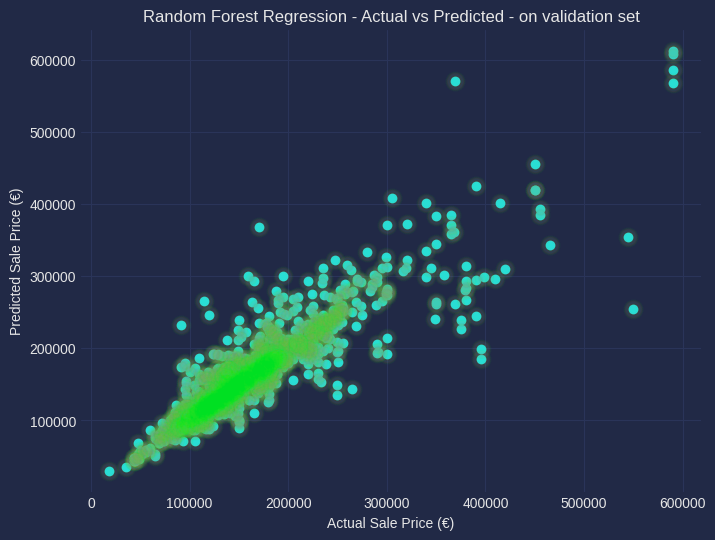

In [7]:
plt.style.use('cyberpunk')
fig, ax = plt.subplots(figsize=(8, 6))
scatter = ax.scatter(y_val, y_val_pred_rf, cmap='cool')

# Enhance the plot with cyberpunk style glow effect
mplcyberpunk.make_scatter_glow(ax)

# Set the title and labels
ax.set_title("Random Forest Regression - Actual vs Predicted - on validation set")
ax.set_xlabel("Actual Sale Price (€)")
ax.set_ylabel("Predicted Sale Price (€)")
plt.show()


/tmp/ipykernel_13221/4040199836.py:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(data_test['Price'], y_test_pred_rf, cmap='cool')


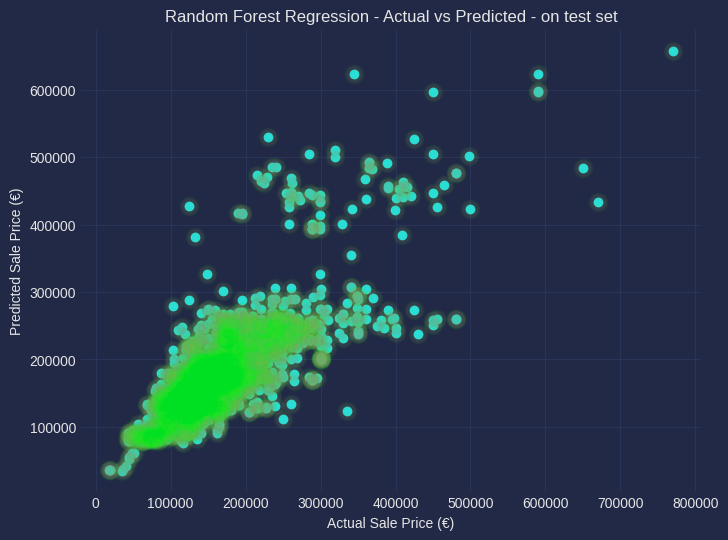

In [8]:
plt.style.use('cyberpunk')
fig, ax = plt.subplots(figsize=(8, 6))
scatter = ax.scatter(data_test['Price'], y_test_pred_rf, cmap='cool')

# Enhance the plot with cyberpunk style glow effect
mplcyberpunk.make_scatter_glow(ax)

# Set the title and labels
ax.set_title("Random Forest Regression - Actual vs Predicted - on test set")
ax.set_xlabel("Actual Sale Price (€)")
ax.set_ylabel("Predicted Sale Price (€)")
plt.show()